# Linear Regression

The purpose of linear regression is to model and predict the relationship between independent and dependent variables. Univariate linear regression predicts a dependent variable from ONE independent variable whereas multiple linear regression predcits a dependent variable from MULTIPLE independent variables.

y = mx + b
Use mean squared error and R^2 (R-squared) to validate model performance.

Sometimes data is nonlinear and another type of regression will better model and predict what's happening.

# Mean Squared Error

MSE = the average of the summation of the squared difference of the observed values and the predicted values.

# R and R-Squared

R is the correlation between two variables.

R^2 is the square of the correlation.

R^2 represents how close the data is to the regression line OR how well the model fits the raw data.

R^2 is between 0 and 1, and the closer this value is to 1 the more variability is explained by the model.

# Classification - KNN

K-nearest neighbor predicts the group of a datapoint based on majority "votes" from nearest neighbors.

K represents the hyperparameter which indicates how many data points any new datapoint must listen to in order to decide what class it is in.

Performance is measured by accuracy, which i sjust the number of correct predictions divided by total predictions.

In [3]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

crime_df = pd.read_csv("crime_data.csv")
crime_df.head()

crime_df.corr()

,X1,X2,X3,X4,X5,X6,X7
X1,1.000000,0.756505,0.533198,-0.135459,0.322519,-0.175224,-0.026283
X2,0.756505,1.000000,0.509339,-0.184445,0.291031,-0.199070,-0.045570
X3,0.533198,0.509339,1.000000,0.120265,0.311526,-0.277475,0.124502
X4,-0.135459,-0.184445,0.120265,1.000000,-0.537162,0.182364,0.681072
X5,0.322519,0.291031,0.311526,-0.537162,1.000000,-0.626953,-0.513958
X6,-0.175224,-0.199070,-0.277475,0.182364,-0.626953,1.000000,0.591663
X7,-0.026283,-0.045570,0.124502,0.681072,-0.513958,0.591663,1.000000


<Axes: >

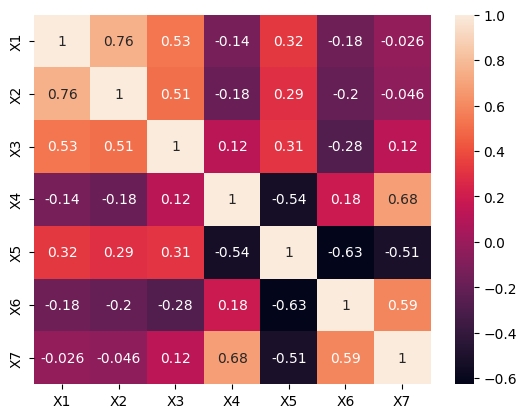

In [7]:
sns.heatmap(crime_df.corr(), annot = True)

In [8]:
crime_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7'], dtype='object')

In [11]:
from sklearn.linear_model import LinearRegression

crime_df = crime_df[['X5', 'X1']]
# X is what we are using to predict
X = np.array(crime_df['X5']).reshape(-1,1)

# y is what we predicting
y = np.array(crime_df['X1']).reshape(-1,1)

# 1. train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) # random_state can be changed to anything

In [12]:
# 2. Create the model and fit the training data to it
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [13]:
# 3. Predict new values using the test data
y_pred = regression_model.predict(X_test)
y_pred

array([[657.03984654],
       [683.63091813],
       [763.40413288],
       [816.58627605],
       [603.85770337],
       [803.29074026],
       [763.40413288],
       [630.44877496],
       [763.40413288],
       [710.22198971],
       [630.44877496],
       [630.44877496],
       [696.92645392],
       [603.85770337],
       [657.03984654]])

In [14]:
# r squared
accuracy_score = regression_model.score(X_test, y_test)
print(accuracy_score)

0.13245401513853428


In [15]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.13245401513853428

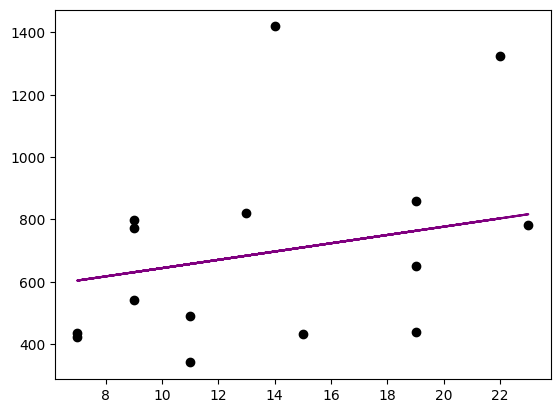

In [24]:
plt.scatter(X_test, y_test, color = 'black')
plt.plot(X_test, y_pred, color = 'purple')

# We see low correlation because the data set is small, and there are a decent number of outliers.

# KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split # ALWAYS IMPORT THIS!

diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


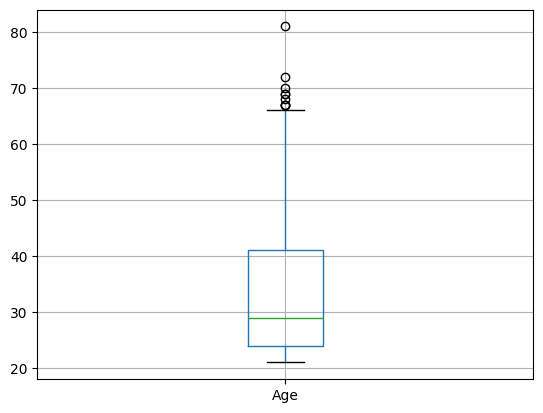

In [33]:
boxplot = diabetes_df.boxplot(column = ['Age'], return_type = 'axes')

In [38]:
X = diabetes_df.drop('Outcome', axis = 1)
y = diabetes_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Standardize / normalize data - transform the values so that the mean is 0 and standard deviation is 1
# Model won't be impacted by large numbers because they're large

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(y_pred)

[0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0]


In [39]:
print(knn.score(X_test, y_test))

0.7142857142857143


In [41]:
diabetes_pred_df = pd.DataFrame(X_test, columns = diabetes_df.columns[0:8])
diabetes_pred_df['Actual_Outcome'] = y_test.tolist()
diabetes_pred_df['Predicted_outcome'] = y_pred.tolist()
diabetes_pred_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Actual_Outcome,Predicted_outcome
0,0.523387,-0.739446,-0.444600,0.720042,0.956067,0.232733,-0.152282,0.786051,0,0
1,-0.590921,-0.289349,0.329998,0.661122,-0.691043,0.433777,-1.077306,-1.059081,0,0
2,-0.590921,-0.417948,-0.171213,-1.224301,-0.691043,-0.145702,-1.044503,-1.059081,0,0
3,1.080541,-0.450098,0.557822,-1.224301,-0.691043,-0.878919,1.245094,0.031224,0,0
4,0.801964,0.482248,1.013468,-1.224301,-0.691043,-0.252136,-0.873932,1.373138,0,1
5,0.523387,-0.578697,0.193304,0.661122,0.956067,0.670299,-0.499986,1.792486,0,0
6,-0.869498,-1.607492,-0.900247,-0.163750,-0.032199,-1.375615,-0.503266,-0.975211,0,0
7,-1.148075,-0.128599,-3.087349,-1.224301,-0.691043,0.209081,1.494391,0.869920,0,0
8,-0.033767,1.060945,0.193304,0.484364,0.401251,-0.086571,-0.454063,0.282833,0,1
9,0.244810,0.835896,0.466692,-1.224301,-0.691043,0.197255,-0.847690,2.631182,0,1


In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix(y_test, y_pred)

array([[126,  25],
       [ 41,  39]])

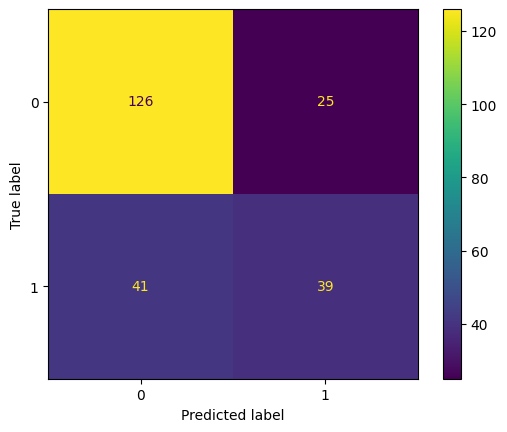

In [45]:
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)